# PA004 - HEALTH INSURANCE CROS-SELL

Last version of project, according Machine Learning Fundamentals course

## 0 - IMPORTS AND FUNCTIONS

In [1]:
import warnings

import scikitplot                                             as skplt
import matplotlib.patches                                     as mpatches
import matplotlib.pyplot                                      as plt
import numpy                                                  as np
import plotly.express                                         as px
import pandas                                                 as pd
import seaborn                                                as sns

from IPython.core.display    import HTML
from IPython.display         import Image

warnings.filterwarnings( 'ignore' )

### 0.1 - HELPER FUNCTIONS

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 24
    sns.set(font_scale=2)
    display( HTML( '<style>.container {width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [ ]:
jupyter_settings()

## 1 - LOADING AND UNDESTANDING DATA

In [2]:
# All data - Linux
#df = pd.read_csv('/home/reng/Documents/ds_repos/Projects/Health_Insurance_Cross_Sell/data/raw/data.csv')

# All Data - Windows
df = pd.read_csv('C:/Users/perot/Documents/ds_repos/projects/Health_Insurance_Cross_Sell/data/raw/data.csv') 

<AxesSubplot: xlabel='annual_premium', ylabel='gender'>

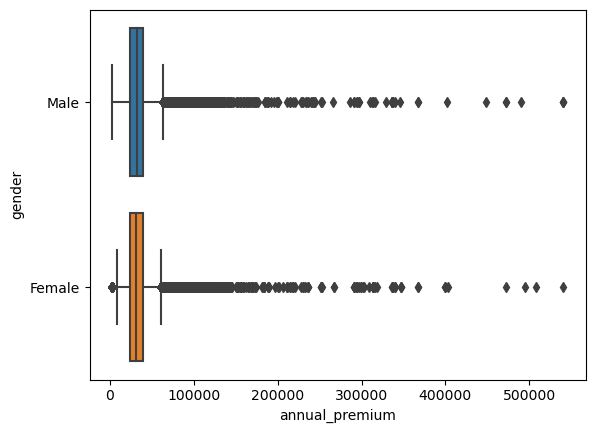

In [12]:
sns.boxplot(data=df, x='annual_premium', y='gender')

In [9]:
df_af.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
1,13,Female,41,15,14,1,1-2 Year,No,1,31409,221,0
4,39,Male,45,8,124,1,1-2 Year,Yes,0,42297,264,0
5,55,Female,44,28,13,1,1-2 Year,Yes,0,45415,73,0
10,114,Male,50,30,26,1,1-2 Year,Yes,0,34271,229,1
12,126,Male,49,28,124,1,1-2 Year,Yes,0,2630,88,0


### 1.2 - DATA DESCRIPTION

In [ ]:
df1 = df.copy()

In [ ]:
# Data Dimensions
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Numfer of Cols: {}'.format( df1.shape[1] ) )

In [ ]:
# Data Types
df1.dtypes

In [ ]:
# Check NAN Values
df1.isna().sum()

### 1.3 - DATA DESCRIPTIVE

In [ ]:
df1.info()

In [ ]:
df1.head()

In [ ]:
# Select columns where the content is different 0 or 1.
num_attributes = df1[['age','annual_premium','vintage']]
cat_attributes = df1[['driving_license','region_code','policy_sales_channel','previously_insured','gender','vehicle_age','vehicle_damage']]

In [ ]:
num_attributes.hist(bins=25, figsize= (10, 5));

In [ ]:
# Looking at the distribuition of the following variables.
fig, axs = plt.subplots(3, figsize = (8, 10))
sns.distplot(df1['age'], ax=axs[0], bins=10)
sns.distplot(df1[df1['annual_premium']<100000]['annual_premium'], ax=axs[1])
sns.distplot(df1['vintage'], ax=axs[2]);

In [ ]:
# Robust Scaller
from sklearn.preprocessing import RobustScaler

In [ ]:
rb = RobustScaler()

In [ ]:
df1['annual_premium'] = rb.fit_transform( df1[['annual_premium']].values )

In [ ]:
df1['annual_premium'] = numpy.log1p(df1['annual_premium'])

In [ ]:
sns.distplot(df1['annual_premium'])

In [ ]:
fig = plt.subplots(figsize = (15,5))
sns.countplot(x='region_code', data=df1)

In [ ]:
policy_1 = df1['policy_sales_channel'].value_counts().iloc[0:55]
policy_1 = policy_1.reset_index()
policy_2 = df1['policy_sales_channel'].value_counts().iloc[55:110]
policy_2 = policy_2.reset_index()
policy_3 = df1['policy_sales_channel'].value_counts().iloc[110:156]
policy_3 = policy_3.reset_index()

fig, axs = plt.subplots(ncols=3, figsize=(15,15))
sns.barplot(y='index', x='policy_sales_channel', data=policy_1, ax=axs[0], orient='h', order=policy_1['index'])
sns.barplot(y='index', x='policy_sales_channel', data=policy_2, ax=axs[1], orient='h', order=policy_2['index'])
sns.barplot(y='index', x='policy_sales_channel', data=policy_3, ax=axs[2], orient='h', order=policy_3['index'])

## 2 - FEATURE ENGINEERING

In [ ]:
df2 = df1.copy()

In [ ]:
# Changing data types
df2['region_code'] = df2['region_code'].astype(object)
df2['policy_sales_channel'] = df2['policy_sales_channel'].astype(object)

In [ ]:
# Fitting vehicle_age column
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 1 if (x == '< 1 Year') else 2 if (x == '1-2 Year') else 3)

# Fitting vehicle_damage column
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if (x == 'Yes') else 0)